# Harmonic Patterns Detection / Study

In [8]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
from datetime import time, datetime
from scipy.signal import argrelextrema

# import plotly.graph_objects as go
# from backtesting import Strategy, Backtest
# from backtesting.lib import TrailingStrategy

In [9]:
# Start the plataform with initialize()
mt5.initialize()

# User credentials

login = 51116412
password = '39sz2vL3'
server = 'ICMarketsSC-Demo'

# log in in the server account of MT5
mt5.login(login, password, server)

True

In [10]:
# Set the ticker
ticker = 'EURCAD'

In [11]:
# If Cambial

# Daily
# data = pd.DataFrame(mt5.copy_rates_from_pos(ticker, mt5.TIMEFRAME_D1, 0, 1000))[['time', 'open', 'high', 'low', 'close','tick_volume']]
# data.rename(columns={'tick_volume': 'volume'}, inplace=True)

# Hourly
data = pd.DataFrame(mt5.copy_rates_from_pos(ticker, mt5.TIMEFRAME_D1, 0, 5000))[['time', 'open', 'high', 'low', 'close','tick_volume']]
data.rename(columns={'tick_volume': 'volume'}, inplace=True)

# Convert time
def unix_to_datetime(timestamp):
    return datetime.utcfromtimestamp(timestamp)

# Apply the function to the 'time' column
data['time'] = data['time'].apply(unix_to_datetime)

___Harmonic Patterns___ são suvjetivos, são padrões que encaixam no comportamento historico de um preço e não onde o preço encaixa.
É defenido por qualquer padrão predefinido cuja finalidade é fazer uma previsão.
Scott Carney foi o "criador" do padrões classicos [Harmonic Trading Book REF]

Fibonacci Ratios - Devide each number bu eithr the number behind it or front ´
    * this converg to a number 0,618
    backward = 1,618

Retracements - Any price movement that goes agains price move before

Lista de Padrões Harmonicos:

__Classic Patterns Types:__
* Gartley
* Butterfly
* Bat
* Crab

__Other Types:__
* Cypher
* Anti-crab(or any other classical pattern)
* Alternte-crab(or any other classical pattern)

Primeiramente há que reconhecer que tanto padrões harmonicos como fibonacci, e sendo os padroes harmonicos baseados em retracements de fibonacci, são padrões que encaixam no preço e não padrões onde o preço encaixa. Desconsiderando o grau de acertividade das seguintes comparações e baseado somente em aplicabilidade de analise tecnica, enquanto padrões como duplo topo, ombro cabeça ombro são padrões visualmente estaticos onde o preço encaixa e dai tenderá numa progressão, com padrões harmonicos o mesmo não acontece tão simplesmente, pois terá de ser sempre considerado o ultimo minimo ou maximo para que tal aconteça, e os resultados que são passados a decisão obtimos por esta metrica são passados a deecisão somente quando ha a confirmação de um padrão e o estamos 1 vela de 1 Dia a confirmar a tendencia. 


Reforço que todo o desenvolvimento foi feito por uma pessoa só e que a Matris pretende essencialmente receber todo o feedback possivel de forma a atribuir esse conhecimento ao Modelo.


In [12]:
data.describe()

,time,open,high,low,close,volume
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2014-03-30 16:17:28.320000,1.457011,1.463658,1.450916,1.457128,78573.911600
min,2004-04-28 00:00:00,1.214990,1.222130,1.212720,1.215000,1.000000
25%,2009-06-25 18:00:00,1.397645,1.404755,1.391182,1.397792,39950.250000
50%,2014-04-15 12:00:00,1.458905,1.463775,1.454190,1.458995,74106.500000
75%,2019-02-11 06:00:00,1.518305,1.525065,1.511592,1.517883,105466.750000
max,2023-12-04 00:00:00,1.721600,1.749900,1.708500,1.722000,342906.000000
std,NaN,0.090462,0.091235,0.089631,0.090415,54288.573695


In [13]:
def peak_detect(close, order=5):
    '''
    This function find the peaks of a timeframe    
    '''

    max_idx = list(argrelextrema(close, comparator=np.greater, order=order)[0])
    min_idx = list(argrelextrema(close, comparator=np.less, order=order)[0])

    idx = max_idx + min_idx + [len(close)-1]

    idx.sort()

    current_idx = idx[-5:]

    start = min(current_idx)
    end = max(current_idx)

    current_pat = close[current_idx]

    return current_idx, current_pat, start, end, idx

In [14]:
close = data.close
current_idx, current_pat, start, end, idx = peak_detect(close.values)

print('X :{}\nA :{}\nB :{}\nC :{}'.format(data.loc[4933], data.loc[4967], data.loc[4997], data.loc[4999]))

X :time      2023-09-01 00:00:00
open                  1.46445
high                  1.47328
low                   1.46327
close                 1.46418
volume                  73565
Name: 4933, dtype: object
A :time      2023-10-19 00:00:00
open                  1.44486
high                  1.45295
low                   1.44365
close                 1.45177
volume                  87344
Name: 4967, dtype: object
B :time      2023-11-30 00:00:00
open                   1.4904
high                  1.49236
low                   1.47575
close                 1.47641
volume                  83106
Name: 4997, dtype: object
C :time      2023-12-04 00:00:00
open                  1.46799
high                  1.47358
low                   1.46724
close                 1.47034
volume                  38551
Name: 4999, dtype: object


In [15]:
def get_gartley_hp(moves, err_allowed):
        
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
                
    AB_range = np.array([.618 - err_allowed, .618 + err_allowed]) * abs(XA)
    BC_range = np.array([.382 - err_allowed, .886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.27 - err_allowed, 1.618 + err_allowed]) * abs(BC)


    # peak information
    peaks = {
        "XA": None,
        "AB": None,
        "BC": None,
        "CD": None
    }

    ## === Bulish Butterfly === ## 
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            peaks["XA"] = XA
            peaks["AB"] = AB
            peaks["BC"] = BC
            peaks["CD"] = CD
            return 1, peaks  # Bullish Crab
        else:
            return np.NAN, peaks

    ## === Bearish Butterfly === ## 
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            peaks["XA"] = XA
            peaks["AB"] = AB
            peaks["BC"] = BC
            peaks["CD"] = CD
            return -1, peaks  # Bullish Crab
        else:
            return np.NAN

    else:
        return np.NAN 

In [16]:
def get_butterfly_hp(moves, err_allowed):
        
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
                
    AB_range = np.array([.786 - err_allowed, .786 + err_allowed]) * abs(XA)
    BC_range = np.array([.382 - err_allowed, .886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)


    # peak information
    peaks = {
        "XA": None,
        "AB": None,
        "BC": None,
        "CD": None
    }

    ## === Bulish Butterfly === ## 
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            peaks["XA"] = XA
            peaks["AB"] = AB
            peaks["BC"] = BC
            peaks["CD"] = CD
            return 1, peaks  # Bullish Crab
        else:
            return np.NAN, peaks

    ## === Bearish Butterfly === ## 
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            peaks["XA"] = XA
            peaks["AB"] = AB
            peaks["BC"] = BC
            peaks["CD"] = CD
            return -1, peaks  # Bullish Crab
        else:
            return np.NAN

    else:
        return np.NAN 

In [17]:
def get_bat_hp(moves, err_allowed):
        
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
                
    AB_range = np.array([.382 - err_allowed, .5 + err_allowed]) * abs(XA)
    BC_range = np.array([.382 - err_allowed, .886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)


    # peak information
    peaks = {
        "XA": None,
        "AB": None,
        "BC": None,
        "CD": None
    }

    ## === Bulish Butterfly === ## 
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            peaks["XA"] = XA
            peaks["AB"] = AB
            peaks["BC"] = BC
            peaks["CD"] = CD
            return 1, peaks  # Bullish Crab
        else:
            return np.NAN, peaks

    ## === Bearish Butterfly === ## 
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            peaks["XA"] = XA
            peaks["AB"] = AB
            peaks["BC"] = BC
            peaks["CD"] = CD
            return -1, peaks  # Bullish Crab
        else:
            return np.NAN

    else:
        return np.NAN 

In [18]:
def get_crab_hp(moves, err_allowed):
        
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
                
    AB_range = np.array([.382 - err_allowed, .618 + err_allowed]) * abs(XA)
    BC_range = np.array([.382 - err_allowed, .886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.24 - err_allowed, 3.618 + err_allowed]) * abs(BC)

    # peak information
    targets = {
        "XA": None,
        "AB": None,
        "BC": None,
        "CD": None
    }

    ## === Bulish Butterfly === ## 
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            targets["XA"] = XA # 3rd Target
            targets["AB"] = AB # 1st Target
            targets["BC"] = BC # 2nd Target
            targets["CD"] = CD # Last Break Point
            
            return 1 # Buy
        else:
            return np.NAN

    ## === Bearish Butterfly === ## 
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            targets["XA"] = XA # 3rd Target
            targets["AB"] = AB # 1st Target
            targets["BC"] = BC # 2nd Target
            targets["CD"] = CD # Last Break Ppint
            
            return -1 # Sell
        else:
            return np.NAN

    else:
        return np.NAN 

  0%|          | 0/4900 [00:00<?, ?it/s]C:\Users\joaom\AppData\Local\Temp\ipykernel_1932\391913392.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonics = np.array([gart, butt, bat, crab])


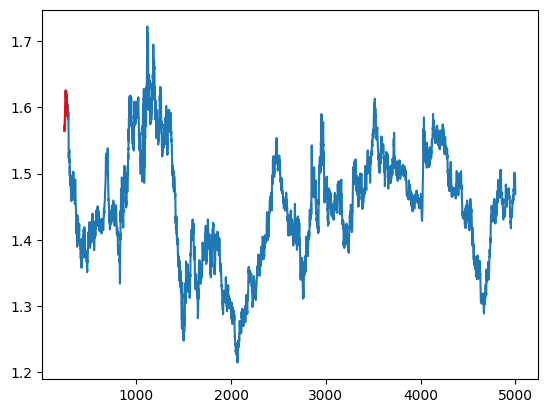

  4%|▎         | 175/4900 [00:00<00:04, 1000.78it/s]

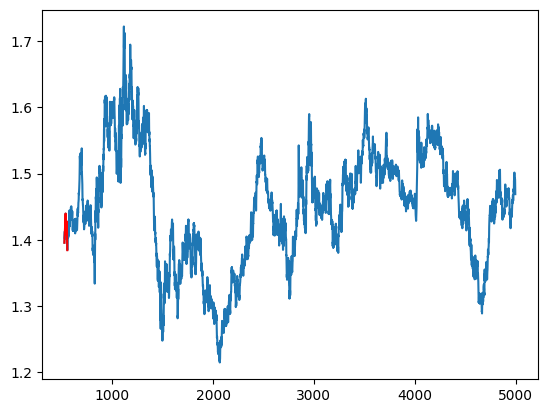

  9%|▉         | 457/4900 [00:00<00:03, 1447.01it/s]

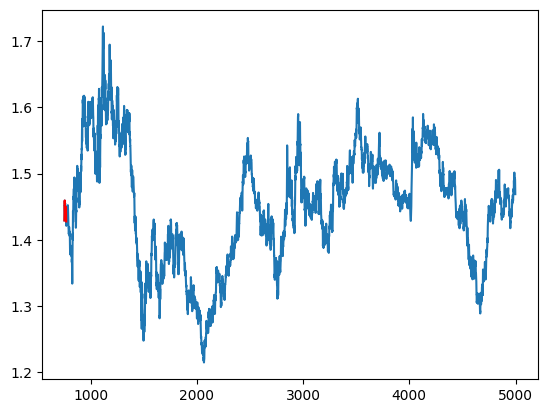

 14%|█▎        | 672/4900 [00:00<00:02, 1420.16it/s]

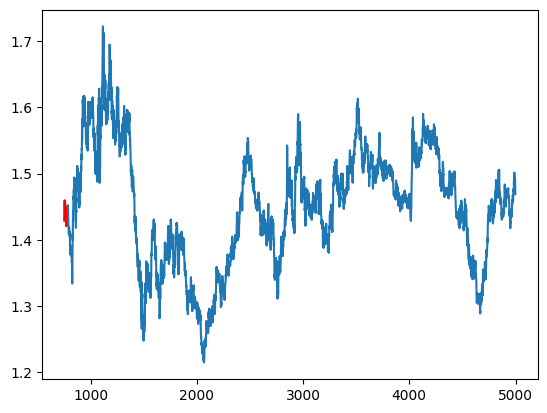

 17%|█▋        | 816/4900 [00:00<00:03, 1259.09it/s]

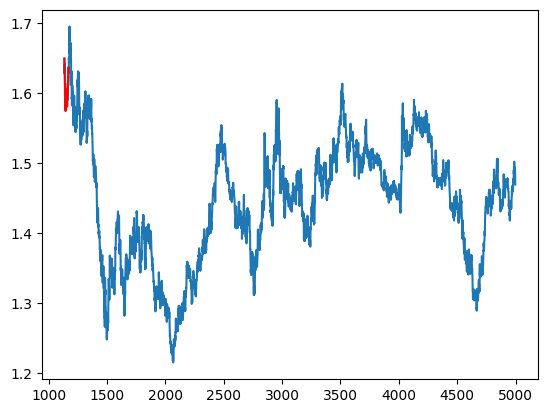

 22%|██▏       | 1073/4900 [00:00<00:02, 1330.45it/s]

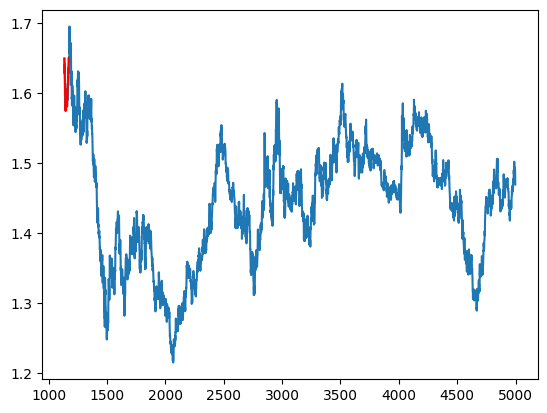

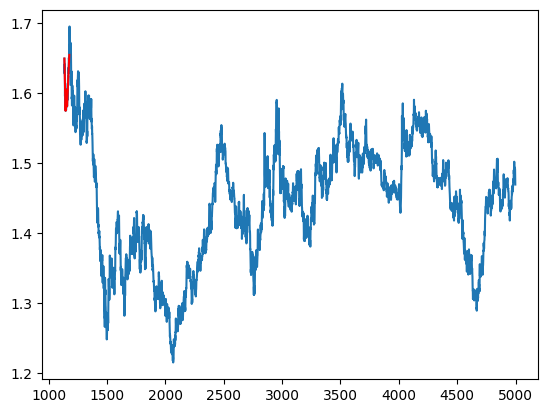

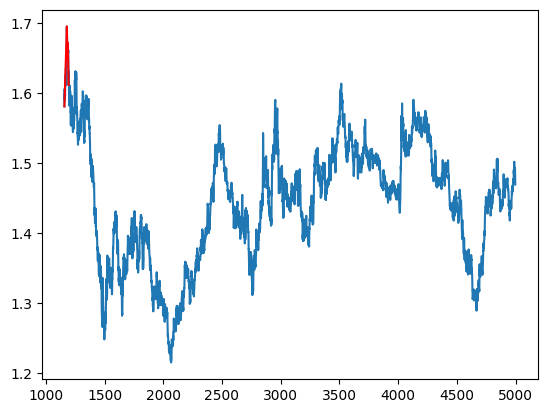

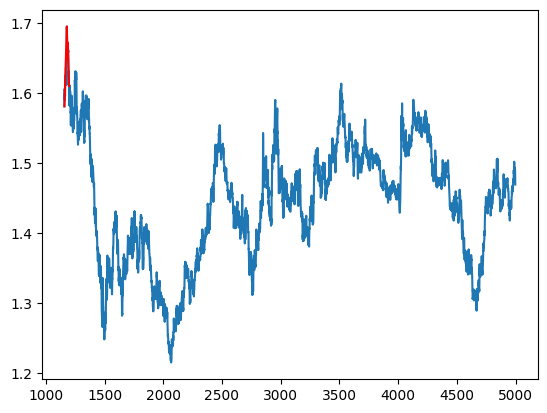

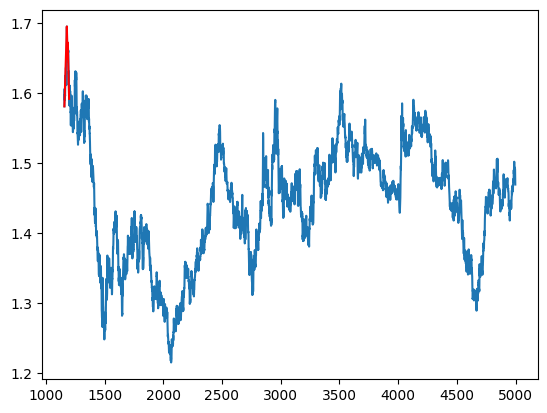

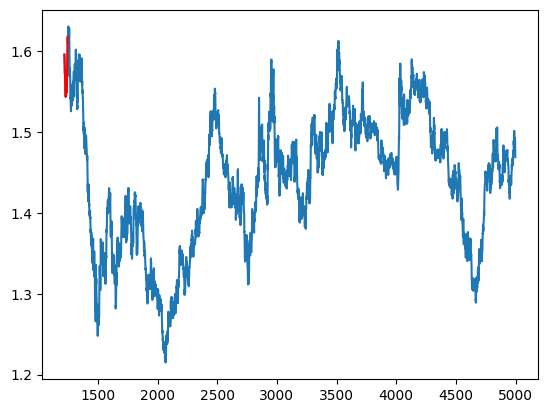

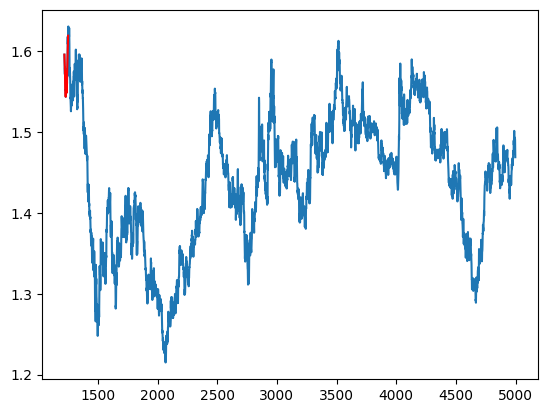

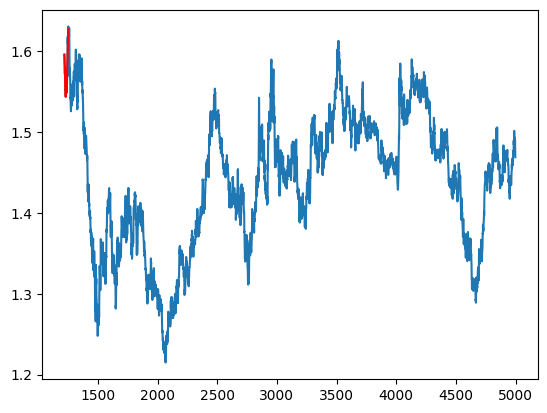

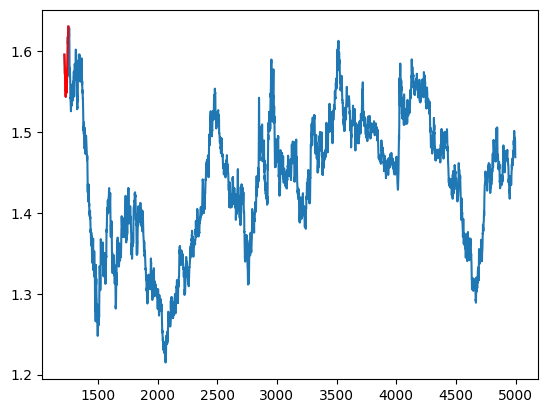

 33%|███▎      | 1635/4900 [00:02<00:04, 683.49it/s] 

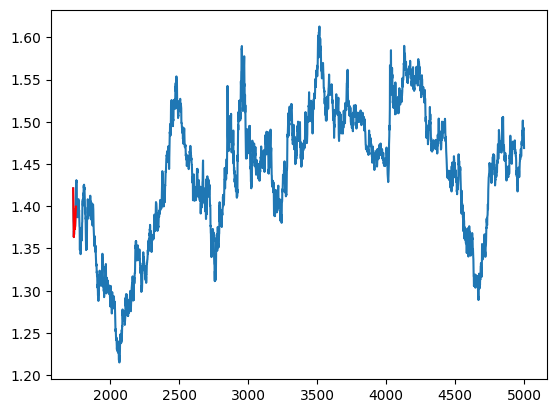

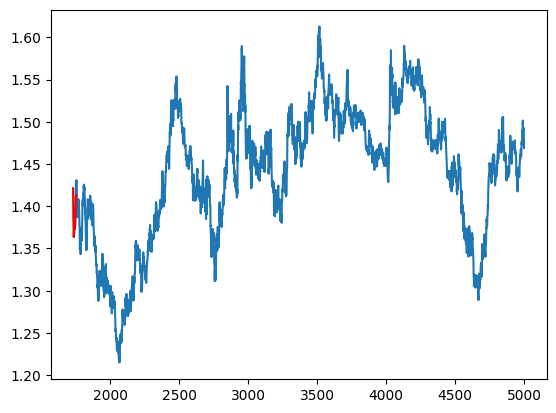

 37%|███▋      | 1789/4900 [00:02<00:05, 583.18it/s]

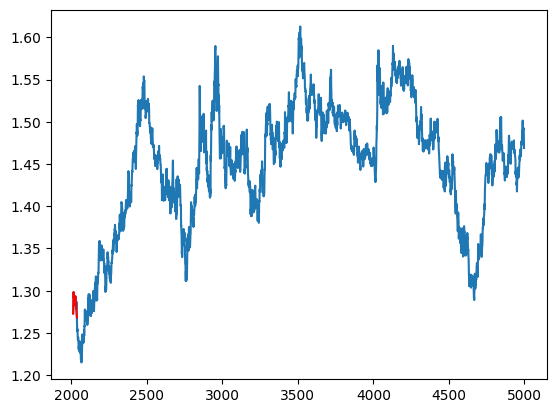

 40%|███▉      | 1939/4900 [00:02<00:04, 610.57it/s]

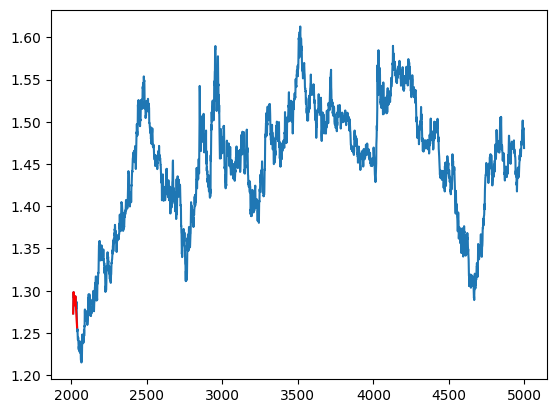

 52%|█████▏    | 2528/4900 [00:03<00:02, 914.08it/s]

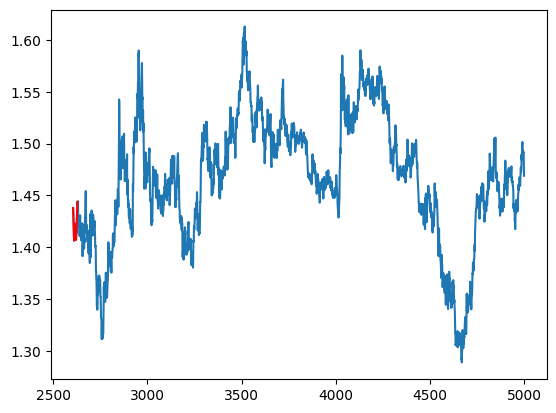

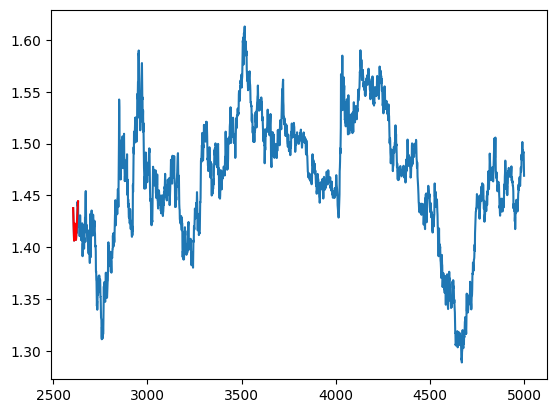

 57%|█████▋    | 2793/4900 [00:03<00:02, 777.33it/s]

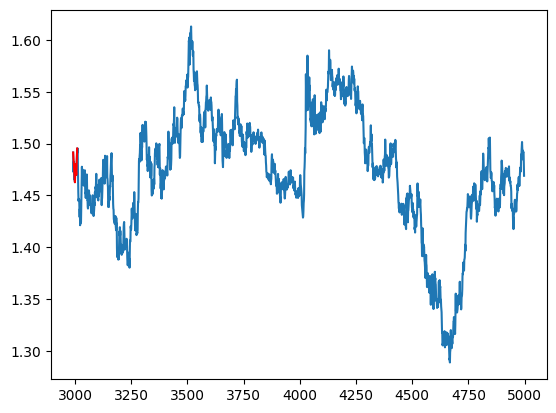

 66%|██████▌   | 3231/4900 [00:04<00:01, 982.79it/s]

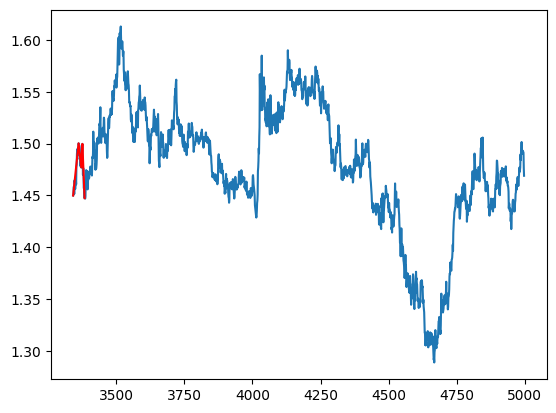

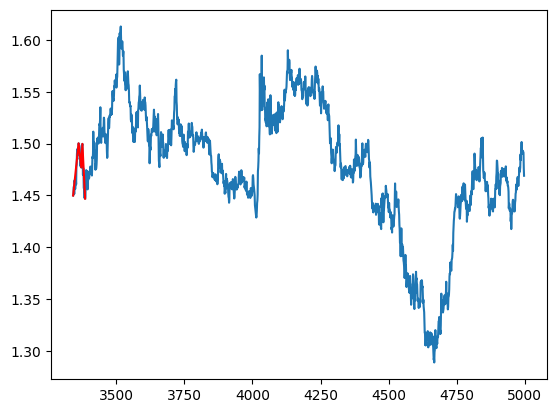

 71%|███████   | 3464/4900 [00:04<00:02, 692.96it/s]

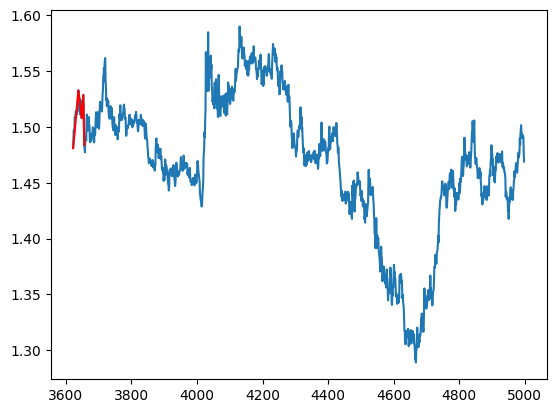

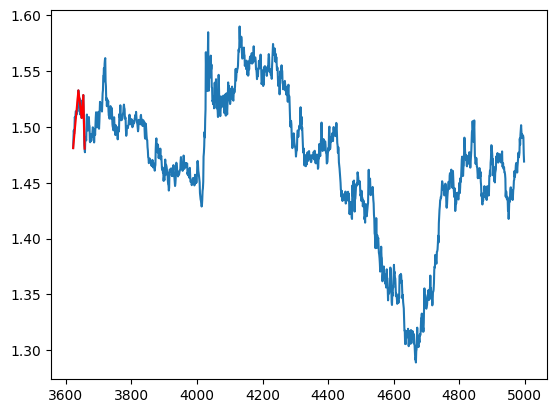

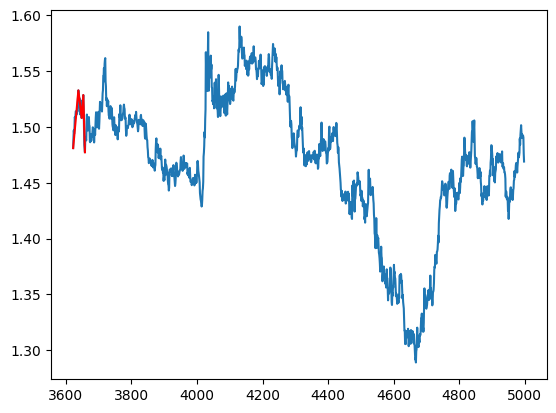

 75%|███████▌  | 3696/4900 [00:05<00:02, 587.71it/s]

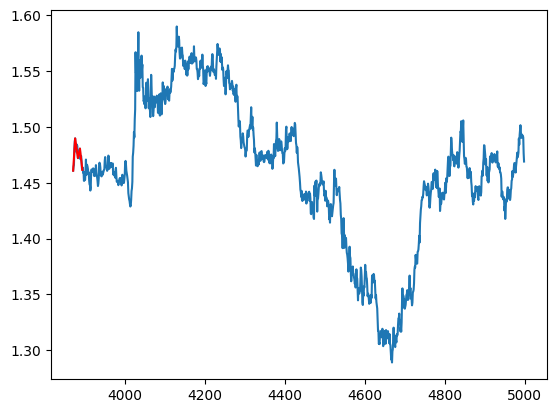

 77%|███████▋  | 3796/4900 [00:05<00:01, 601.89it/s]

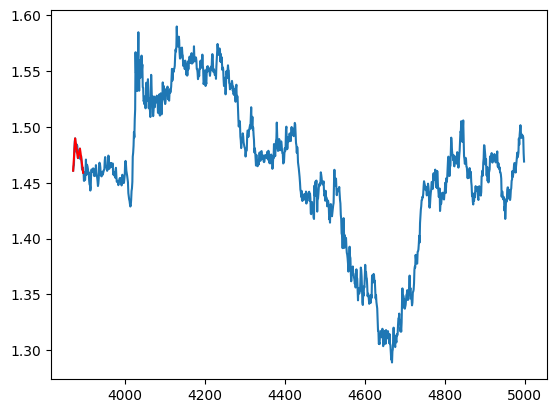

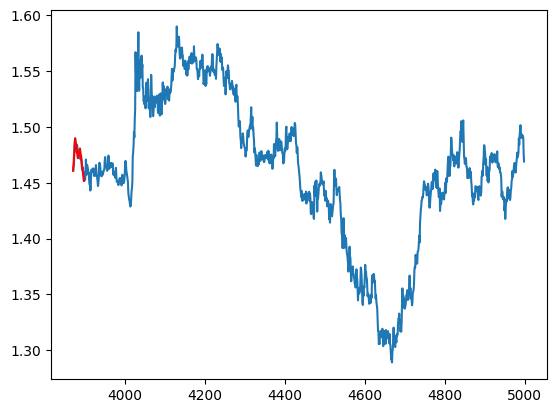

 82%|████████▏ | 4004/4900 [00:05<00:01, 625.76it/s]

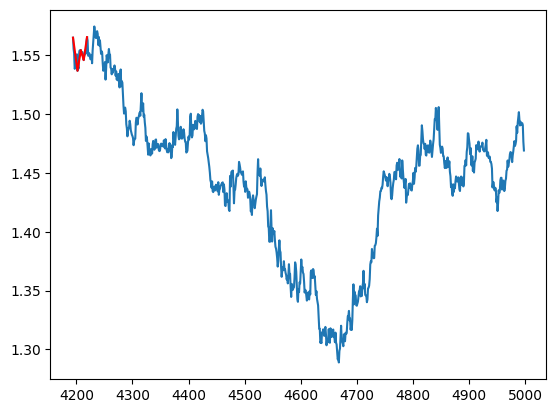

 99%|█████████▉| 4852/4900 [00:06<00:00, 1039.87it/s]

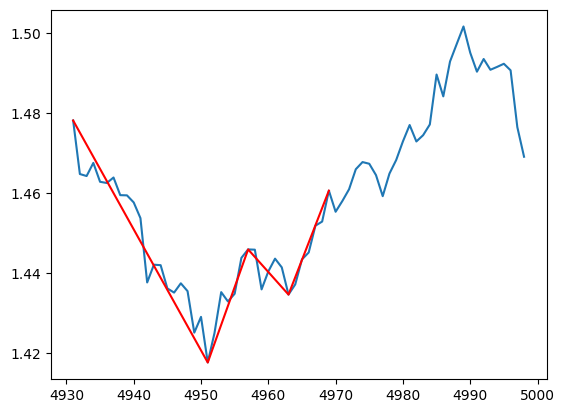

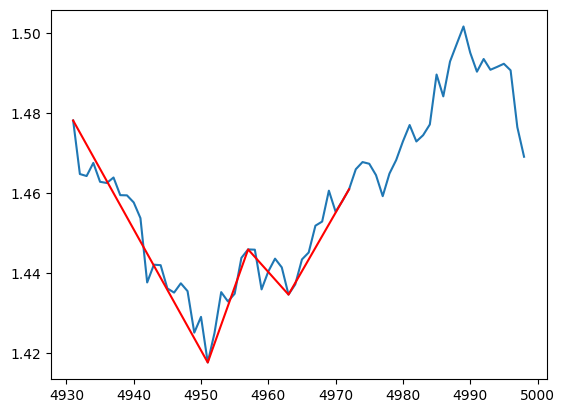

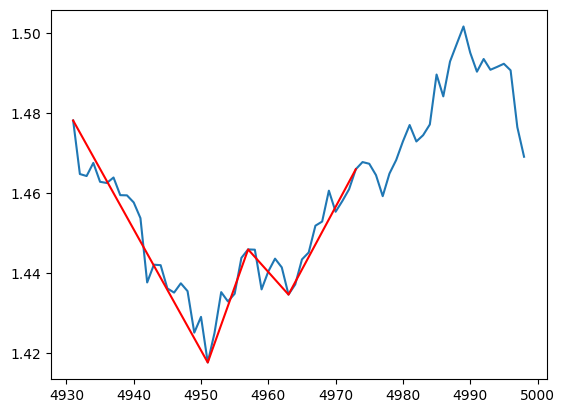

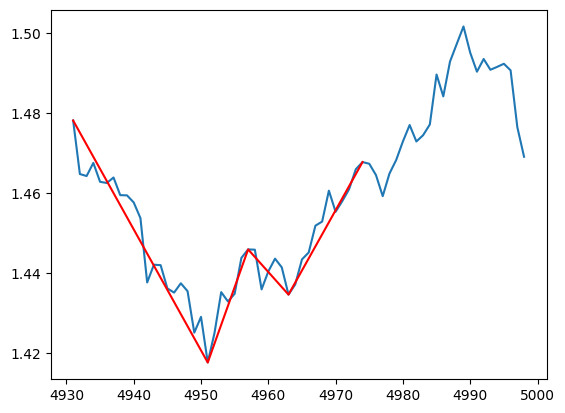

100%|██████████| 4900/4900 [00:07<00:00, 688.98it/s] 

No Pattern Detected


In [19]:
# Dados de close
close = data.close.copy()

# varivael Margem de Erro de Detecção
err_allowed = 10.0/100

last_detected_pattern = None

for i in tqdm(range(100, len(close))):
    current_idx, current_pat, start, end, idx = peak_detect(close.values[:i])

    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]

    moves = [XA, AB, BC, CD]

    gart = get_gartley_hp(moves, err_allowed)
    butt = get_butterfly_hp(moves, err_allowed)
    bat = get_bat_hp(moves, err_allowed)
    crab = get_crab_hp(moves, err_allowed)

    harmonics = np.array([gart, butt, bat, crab])
    labels = ['Gartley', 'Butterfly', 'Bat', 'Crab']

    if np.any(harmonics == 1) or np.any(harmonics == -1):
        for j in range(0, len(harmonics)):
            if harmonics[j] == 1 or harmonics[j] == -1:
                signal = 'Bearish ' if harmonics[j] == -1 else 'Bullish '
                label = signal + labels[j] + ' Found'

                start = min(current_idx)
                end = max(current_idx)
                date = data.iloc[end].name

                last_detected_pattern = {
                    "start": start,
                    "end": i,
                    "current_idx": current_idx,
                    "current_pat": current_pat,
                    "label": label
                }

                plt.plot(np.arange(start,data.index[-1]),close.values[start:-1])
                plt.plot(current_idx, current_pat, c='r')
                plt.show()

# # Plot the last detected pattern using a candlestick chart
# if last_detected_pattern is not None:
#     x_values = np.arange(last_detected_pattern["start"], last_detected_pattern["end"] + 1)
#     y_values = close.values[last_detected_pattern["start"]:last_detected_pattern["end"] + 1]

#     plt.plot(x_values, y_values)
#     plt.plot(current_idx, current_pat, c='r')
#     plt.show()

#     print(current_idx, last_detected_pattern["start"], last_detected_pattern["end"])
#     print('Pattern : {}\nX :{}\nA :{}\nB :{}\nC :{}\nD :{}'.format(last_detected_pattern["label"],data.loc[last_detected_pattern["start"]], data.loc[current_idx[1]], data.loc[current_idx[2]], data.loc[current_idx[3]], data.loc[last_detected_pattern["end"]]))

else:
    print("No Pattern Detected")



Since we are in checking the full history of the data in a timeframe of 1D the larger the pattern the longer the trade
Is necessary to regard only the most recente patern detected and if targets dont were obtain in a timeline (TO CHECK the avg timeline of progression) 

Exemplo perfeito EURCAD com timeline the 1D e order = 5 